In [1]:
# Numerical Computation 
import numpy as np

# DataFrames or Spreadsheet stuff
import pandas as pd

# Visualisation: Matplotlib -> Seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning: scikit-learn (based on scipy)
import sklearn

In [2]:
pwd


'D:\\python3'

In [3]:
ls

 Volume in drive D is RECOVERY
 Volume Serial Number is B8C5-8737

 Directory of D:\python3

11/25/2018  11:08 AM    <DIR>          .
11/25/2018  11:08 AM    <DIR>          ..
11/25/2018  11:07 AM    <DIR>          .ipynb_checkpoints
04/20/2018  06:58 PM            19,208 api-ms-win-core-console-l1-1-0.dll
04/20/2018  06:58 PM            18,696 api-ms-win-core-datetime-l1-1-0.dll
04/20/2018  06:58 PM            18,696 api-ms-win-core-debug-l1-1-0.dll
04/20/2018  06:58 PM            18,696 api-ms-win-core-errorhandling-l1-1-0.dll
04/20/2018  06:59 PM            22,280 api-ms-win-core-file-l1-1-0.dll
04/20/2018  07:07 PM            18,696 api-ms-win-core-file-l1-2-0.dll
04/20/2018  07:07 PM            18,696 api-ms-win-core-file-l2-1-0.dll
04/20/2018  07:07 PM            18,696 api-ms-win-core-handle-l1-1-0.dll
04/20/2018  07:07 PM            19,208 api-ms-win-core-heap-l1-1-0.dll
04/20/2018  07:07 PM            18,696 api-ms-win-core-interlocked-l1-1-0.dll
04/20/2018  07:07 PM          

In [6]:
df = pd.read_csv("creditRisk.csv")

In [7]:
df.shape

(18, 3)

In [8]:
df.columns

Index(['Income', 'Credit History', 'Risk'], dtype='object')

In [9]:
df.head()

,Income,Credit History,Risk
0,0,Unknown,High
1,0,Bad,High
2,0,Good,High
3,14000,Unknown,High
4,14000,Bad,High


In [10]:
# See the data
plt.style.use("ggplot")

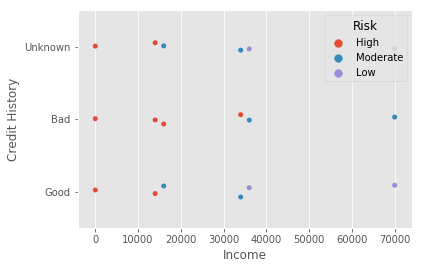

In [11]:
sns.stripplot(x=df.Income, y = df["Credit History"], hue=df.Risk)

In [12]:

df_encoded = df.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:

# Instantiate an instance of it
le = LabelEncoder()

In [15]:
# Fit the label encoder
le.fit(df['Credit History'])


LabelEncoder()

In [16]:
df_encoded["Credit History"]= le.transform(df["Credit History"])

In [17]:

le.classes_

array(['Bad', 'Good', 'Unknown'], dtype=object)

In [18]:

le.inverse_transform(np.array([0,1,2]))

D:\python3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Bad', 'Good', 'Unknown'], dtype=object)

In [19]:
df_encoded.head()

,Income,Credit History,Risk
0,0,2,High
1,0,0,High
2,0,1,High
3,14000,2,High
4,14000,0,High


In [20]:
le2 = LabelEncoder()
le2.fit(df.Risk)
df_encoded["Risk"] = le2.transform(df.Risk)

In [21]:
df_encoded.head()

,Income,Credit History,Risk
0,0,2,0
1,0,0,0
2,0,1,0
3,14000,2,0
4,14000,0,0


In [22]:
X = df_encoded[["Income", "Credit History"]]
y = df_encoded["Risk"]

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Instantiate the Object
clf = DecisionTreeClassifier()

In [25]:
# Fit it on the features and target
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
!pip install modelvis


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
import modelvis

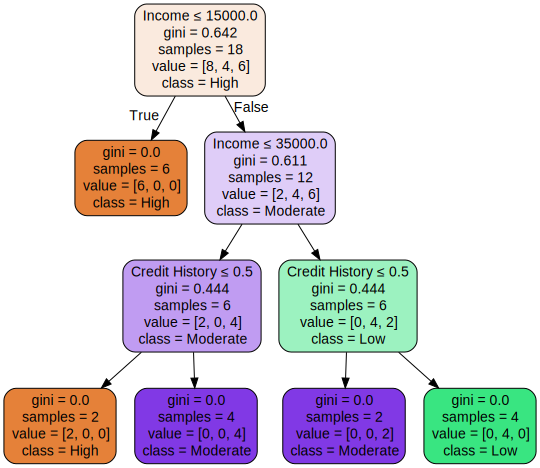

In [29]:
modelvis.render_tree(clf, feature_names=X.columns,
                    class_names=['High', 'Low', 'Moderate'])

In [30]:
modelvis.print_tree_as_code(clf)

def predict(row):
    """Your decision-tree model wrote this code."""
    # 18 samples; value=[8, 4, 6]; class=0
    if row[0] < 15000.0:
        # 6 samples; value=[6, 0, 0]; class=0
        return 0
    else:
        # 12 samples; value=[2, 4, 6]; class=2
        if row[0] < 35000.0:
            # 6 samples; value=[2, 0, 4]; class=2
            if row[1] < 0.5:
                # 2 samples; value=[2, 0, 0]; class=0
                return 0
            else:
                # 4 samples; value=[0, 0, 4]; class=2
                return 2
        else:
            # 6 samples; value=[0, 4, 2]; class=1
            if row[1] < 0.5:
                # 2 samples; value=[0, 0, 2]; class=2
                return 2
            else:
                # 4 samples; value=[0, 4, 0]; class=1
                return 1



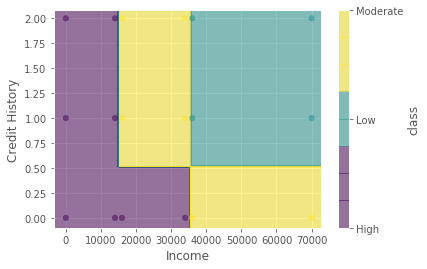

In [31]:
modelvis.plot_decision_boundaries(clf, X, y,
                                 feature_names=X.columns, show_input = True,
                                 class_names=["High", "Low", "Moderate"])

In [45]:
y_true = y
y_pred = clf.predict(X)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_true, y_pred)

1.0

In [40]:
a = np.arange(-10, 10, 1)

In [41]:
a

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [42]:
def logit(a):
    b = 1/(1+ np.exp(-a))
    return b

In [43]:
b = logit(a)

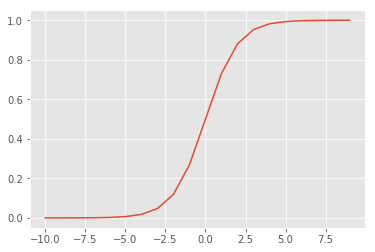

In [44]:
plt.plot(a,b)

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1], dtype=int64)

In [50]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression(multi_class="ovr", solver="liblinear")

In [65]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
y = df_encoded['Risk']

In [67]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
y_true = y
y_pred = lr.predict(X)

In [69]:
accuracy_score(y_true, y_pred)

0.5555555555555556

In [71]:
# modelvis.plot_decision_boundaries(clf, X, y,
#                                  feature_names=X.columns, show_input = True,
#                                  class_names=["High", "Low", "Moderate"])